In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

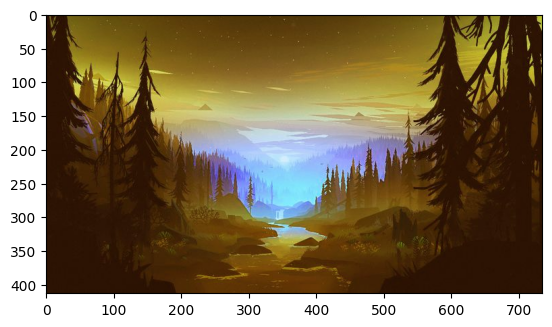

In [37]:
img = cv2.imread("./demo.jpg")
plt.imshow(img)

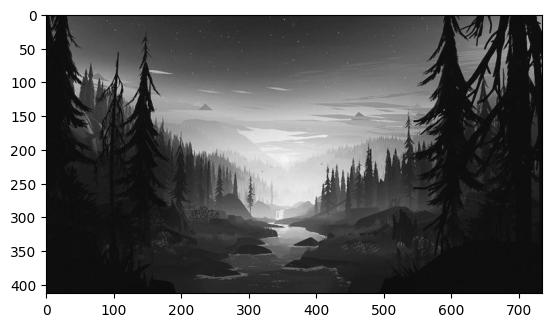

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

In [43]:
# Calculate the gradient gx, gy
gx = cv2.Sobel(gray, cv2.CV_32F, dx=0, dy=1, ksize=3)
gy = cv2.Sobel(gray, cv2.CV_32F, dx=1, dy=0, ksize=3)

print("gray shape: ", gray.shape)
print("gx shape: ", gx.shape)
print("gy shape: ", gy.shape)

gray shape:  (413, 735)
gx shape:  (413, 735)
gy shape:  (413, 735)


In [44]:
g, theta = cv2.cartToPolar(gx, gy, angleInDegrees=True)
print("g shape: ", g.shape)
print("theta shape: ", theta.shape)

g shape:  (413, 735)
theta shape:  (413, 735)


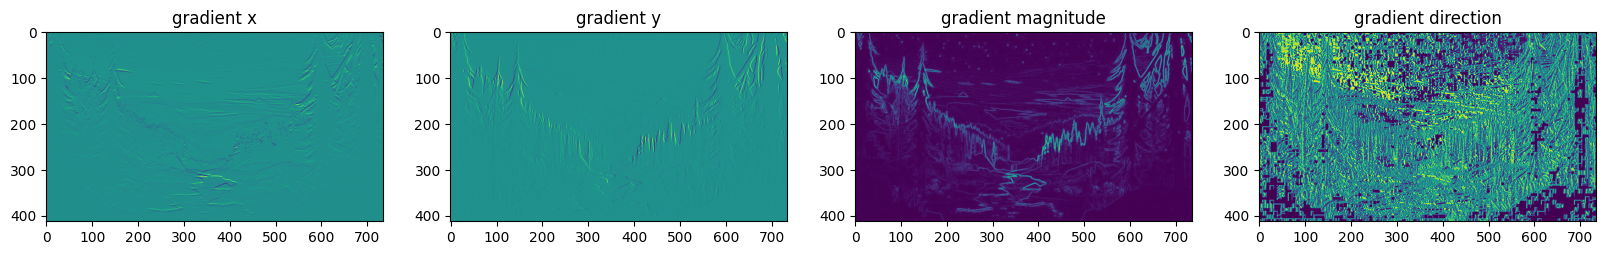

In [45]:
w = 20
h = 10

plt.figure(figsize=(w, h))
plt.subplot(1, 4, 1)
plt.title("gradient x")
plt.imshow(gx)

plt.subplot(1, 4, 2)
plt.title("gradient y")
plt.imshow(gy)

plt.subplot(1, 4, 3)
plt.title("gradient magnitude")
plt.imshow(g)

plt.subplot(1, 4, 4)
plt.title("gradient direction")
plt.imshow(theta)

In [46]:
print("Kich thuoc anh goc: ", img.shape)

Kich thuoc anh goc:  (413, 735, 3)


In [47]:
cell_size = (8, 8)
block_size = (2, 2)
nbins = 9

# winSize is the size of the image cropped to an multiple of the cell size
winSize = (
    img.shape[1] // cell_size[1] * cell_size[1],
    img.shape[0] // cell_size[0] * cell_size[0],
)
# blockSize is the size of the block to be normalized
blockSize = (
    block_size[1] * cell_size[1],
    block_size[0] * cell_size[0],
)
# blockStride is the distance between sucessive blocks
blockStride = (cell_size[1], cell_size[0])

print("winSize: ", winSize)
print("blockStride: ", blockStride)
print("blockSize: ", blockSize)

winSize:  (728, 408)
blockStride:  (8, 8)
blockSize:  (16, 16)


In [48]:
n_cells = (img.shape[0]//cell_size[0], img.shape[1]//cell_size[1])
print("n_cells: ", n_cells)

n_cells:  (51, 91)


In [ ]:
hog = cv2.HOGDescriptor(_winSize=winSize, _blockSize=blockSize, _blockStride=blockStride, _cellSize=cell_size, _nbins=nbins)